In [1]:
import random
import numpy as np
import torch
import torch.utils.data
import glob
import layers
from utils import load_wav_to_torch, load_filepaths_and_text
from text import text_to_sequence
import hparams
import os
import matplotlib.pyplot as plt
from pathlib import Path
hparams = hparams.create_hparams()
import warnings
warnings.filterwarnings('ignore')


/home/xliu0/anaconda3/envs/taco/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/xliu0/anaconda3/envs/taco/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/xliu0/anaconda3/envs/taco/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/xliu0/anaconda3/envs/taco/lib/python3.6/site-pack

In [2]:
stft = layers.TacotronSTFT(
            hparams.filter_length, hparams.hop_length, hparams.win_length,
            hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
            hparams.mel_fmax)

def get_mel(filename, dataset = 'IEMOCAP'):
    audio, sampling_rate = load_wav_to_torch(filename, dataset=dataset)
    if sampling_rate != stft.sampling_rate:
        raise ValueError("{} {} SR doesn't match target {} SR".format(
            sampling_rate, stft.sampling_rate))
#     audio_norm = audio / hparams.max_wav_value
    audio_norm = audio
    audio_norm = audio_norm.unsqueeze(0)
    audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
    melspec = stft.mel_spectrogram(audio_norm)
    melspec = torch.squeeze(melspec, 0)
    melspec = melspec.data.numpy()
    return melspec

def save_spec(data, filepath, output_filename):
    if not(os.path.exists(filepath)):
        Path(filepath).mkdir(parents=True)
    np.save(os.path.join(filepath, output_filename), data)

def plot_spectrogram_to_numpy(spectrogram):
    fig, ax = plt.subplots(figsize=(12, 3))
    im = ax.imshow(spectrogram, aspect="auto", origin="lower",
                   interpolation='none')
    plt.colorbar(im, ax=ax)
    plt.xlabel("Frames")
    plt.ylabel("Channels")
    plt.tight_layout()
    plt.show()
    

## IEMOCAP


In [3]:
SESS_PATH = '/data3/IEMOCAP/IEMOCAP_full_release/Session1/sentences/wav/'
for sess in list(range(1,6)):
    temp_sess_path = SESS_PATH.replace('1', str(sess))
    all_wav_path = sorted(glob.glob(temp_sess_path + '*/*.wav'))
    for wav_path in all_wav_path:
        spec = get_mel(wav_path)
        output_filename = wav_path.split('/')[-1].split('.')[0]
        spec_path = Path(wav_path.replace('IEMOCAP_full_release', 'IEMOCAP_full_release_spec'))
        spec_path = str(spec_path.parent)
        save_spec(spec, spec_path, output_filename)
        plot_spectrogram_to_numpy(spec)
        break
    break
    print('Finished Session ', str(sess))
        

data2:  [-0.0050354  -0.00497437 -0.0038147  ... -0.00265503 -0.00317383
 -0.00418091]


IndexError: tuple index out of range

## VCTK

In [24]:
VCTK_PATH = '/data3/VCTK/VCTK-Corpus/wav48/'
for wav_path in sorted(glob.glob(VCTK_PATH + '*/*.wav')):
    output_filename = wav_path.split('/')[-1].split('.')[0]
    spec_path = Path(wav_path.replace('/VCTK/', '/VCTK_spec/'))
    spec_path = str(spec_path.parent)
    check_file_path = os.path.join(spec_path, output_filename)
    check_file_path = str(check_file_path) + '.npy'
    if os.path.exists(check_file_path):
        print('got it')
        continue
    print(check_file_path)
    spec = get_mel(wav_path)
    save_spec(spec, spec_path, output_filename)    

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it
got it

KeyboardInterrupt: 

# LJ

In [3]:
LJ_PATH = '/data3/LJSpeech-1.1/wavs/'
for wav_path in sorted(glob.glob(LJ_PATH + '*.wav')):
    spec = get_mel(wav_path, dataset='LJ')
    output_filename = wav_path.split('/')[-1].split('.')[0]
    spec_path = Path(wav_path.replace('/LJSpeech-1.1/', '/LJSpeech-1.1-spec/'))
    spec_path = str(spec_path.parent)
    save_spec(spec, spec_path, output_filename)
    print(spec.shape)
    plot_spectrogram_to_numpy(spec)
    break


AssertionError: 

data2:  [-7.3242188e-04 -7.6293945e-04 -6.4086914e-04 ...  7.3242188e-04
  2.1362305e-04  6.1035156e-05]
(80, 1065)


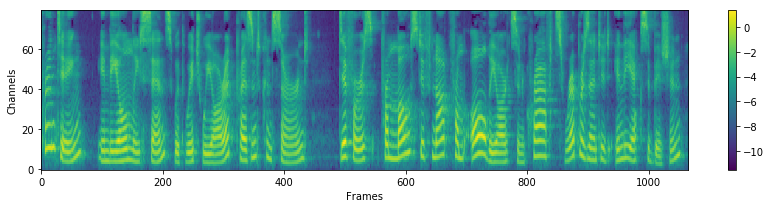

In [3]:
LJ_PATH = '/data3/LJSpeech-1.1/wavs/'
for wav_path in sorted(glob.glob(LJ_PATH + '*.wav')):
    spec = get_mel(wav_path, dataset='LJ')
    output_filename = wav_path.split('/')[-1].split('.')[0]
    spec_path = Path(wav_path.replace('/LJSpeech-1.1/', '/LJSpeech-1.1-spec/'))
    spec_path = str(spec_path.parent)
    save_spec(spec, spec_path, output_filename)
    print(spec.shape)
    plot_spectrogram_to_numpy(spec)
    break


## Quality Check

In [16]:
SESS_PATH = '/data3/IEMOCAP/IEMOCAP_full_release/Session1/sentences/wav/'
for sess in list(range(1,6)):
    temp_sess_path = SESS_PATH.replace('1', str(sess))
    temp_sess_path_spec = temp_sess_path.replace('IEMOCAP_full_release', 'IEMOCAP_full_release_spec')
    all_wav_path = sorted(glob.glob(temp_sess_path + '*/*.wav'))
    all_wav_path_spec = sorted(glob.glob(temp_sess_path_spec + '*/*.npy'))
    if len(all_wav_path) == len(all_wav_path_spec):
        print('True')
    else:
        prin('Something is wrong!!!!')

True
True
True
True
True


In [7]:
VCTK_PATH = '/data3/VCTK/VCTK-Corpus/wav48/'
print(len(sorted(glob.glob(VCTK_PATH + '*/*.wav'))))

VCTK_PATH = '/data3/VCTK_spec/VCTK-Corpus/wav48/'
print(len(sorted(glob.glob(VCTK_PATH + '*/*.npy'))))

44257
44257


In [22]:
LJ_PATH = '/data3/LJSpeech-1.1/wavs/'
print(len(sorted(glob.glob(LJ_PATH + '*.wav'))))

LJ_PATH = '/data3/LJSpeech-1.1-spec/wavs/'
print(len(sorted(glob.glob(LJ_PATH + '*.npy'))))


13100
13100
